# Kernel regression demo

In [2]:
import numpy as np
import pandas as pd
import sklearn as sklearn
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots

## Generate XOR data

In [3]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

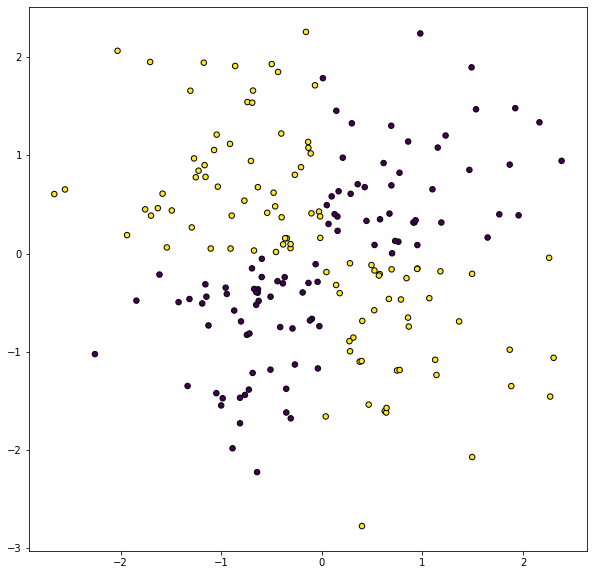

In [4]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.viridis, edgecolors=(0, 0, 0))

## Do kernel regression using all the points

In [5]:
# build the kernel matrix

s = 2.0 # kernel width
pairwise_dists = squareform(pdist(X, 'euclidean'))
K = np.exp(-pairwise_dists ** 2 / s ** 2)

# build a logistic model on the kernel matrix

clf = LogisticRegression()
clf.fit(K,Y)

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),np.linspace(-3, 3, 50))
Kt = cdist(X,np.vstack((xx.ravel(), yy.ravel())).T,'euclidean').T
Kt = np.exp(-Kt**2/s**2)

# convert to kernel form so we can predict 
Z = clf.predict_proba(Kt)[:, 1]
Z = Z.reshape(xx.shape)

## Visualize the decision boundaries

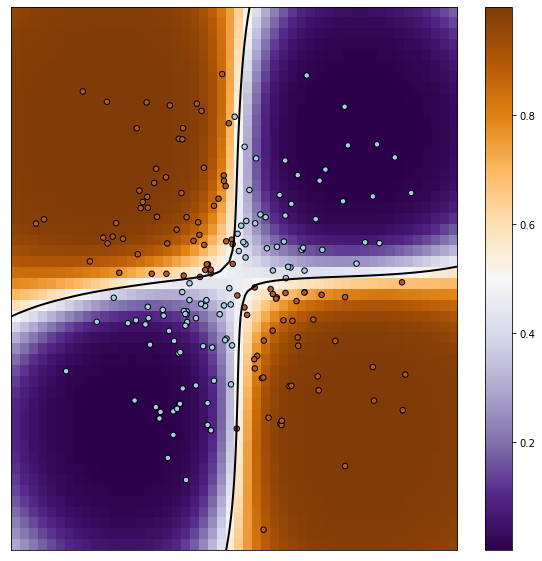

In [6]:
image = plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0.5], linewidths=2,colors=['k'])
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,edgecolors=(0, 0, 0))
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.colorbar(image)